# Pymaceuticals Inc.
---

### Analysis

- Bar graphs: Animals in the Drug Regimen groups Capomulin and Ramicare appear to have data points from more timepoints than placebo and animals in the Drug Regimen group Propiva appear to have fewer (perhaps due to the removal of the duplicate data). For more accurate results, all groups should be observed at more similar numbers of timepoints.
- Pie Charts: There is a relatively equal percentage of male and female animals used in this study. This means that data will not be skewed in favor of one sex over the other. Perhaps these groups should be separated, if trending towards a sex difference.
- Boxplot: The median for Capomulin is closer to the upper boundary and has a longer lower tail, suggesting the data is left-skewed. This may also be true for Ramicane and Ceftamin, but less so. The outlier in the Infubinol group is making the average for this group more negative. It may need to be removed for more accurate statistics.
- Line graph: For mouse l509, the tumor volume increased until day 20, where it begin to decrease in volume. There is a slight increase in volume between days 25 and 30, but, overall, the tumor decreased in volume until day 35. After day 35, the tumor begins to increase in volume again.
-Scatterplot: The correlation between animal weight and tumor volume is greater than 0.75, this means there is a strong correlation between these two factors. It does not, however, guarantee that there is a causation relationship.
 

In [569]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_data_df = study_results.merge(mouse_metadata, how='left', on="Mouse ID")

# Display the data table for preview
full_data_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [570]:
# Checking the number of mice.
num_mice = len(full_data_df["Mouse ID"].unique())
num_mice

249

In [571]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
full_data_df[full_data_df.duplicated(["Mouse ID", "Timepoint"])]
#is this the correct output?

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [572]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_df = full_data_df.loc[full_data_df['Mouse ID'] == "g989"]
dup_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [573]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_full_data_df = full_data_df[full_data_df["Mouse ID"] != "g989"]
clean_full_data_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [574]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = len(clean_full_data_df["Mouse ID"].unique())
new_num_mice

248

## Summary Statistics

In [575]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_sum = clean_full_data_df.groupby("Drug Regimen")
tumor_mean = stat_sum["Tumor Volume (mm3)"].mean()
tumor_median = stat_sum["Tumor Volume (mm3)"].median()
tumor_variance = stat_sum["Tumor Volume (mm3)"].var()
tumor_std = stat_sum["Tumor Volume (mm3)"].std()
tumor_sem = stat_sum["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stat_sum = pd.DataFrame([tumor_mean, tumor_median, tumor_variance, tumor_std, tumor_sem]).T
stat_sum = stat_sum.rename(columns={"tumor_mean":"Mean Tumor Volume", "tumor_median":"Median Tumor Volume",
                                     "tumor_variance":"Tumor Volume Variance", "tumor_std":"Tumor Volume Std. Dev.",
                                     "tumor_sem":"Tumor Volume Std. Err."})

stat_sum

,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [576]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stat_sum_2 = clean_full_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
stat_sum_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

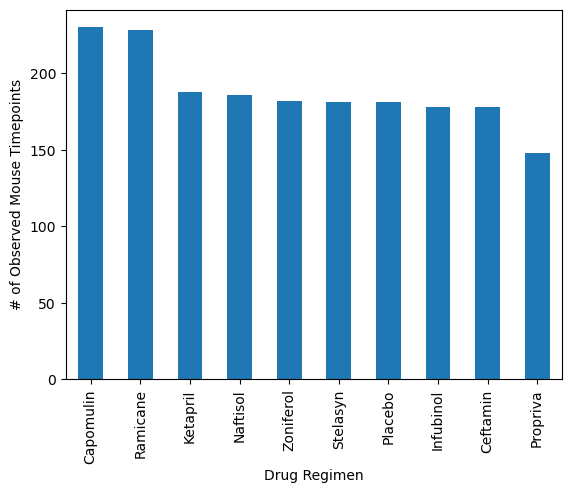

In [577]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count = clean_full_data_df["Drug Regimen"].value_counts()
panda_bar = count.plot.bar()
panda_bar.set_xlabel("Drug Regimen")
panda_bar.set_ylabel("# of Observed Mouse Timepoints")


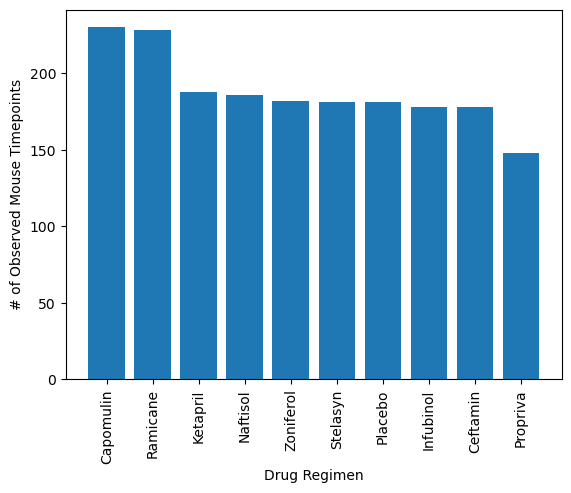

In [578]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(count.index.values,count.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

<Axes: ylabel='Sex'>

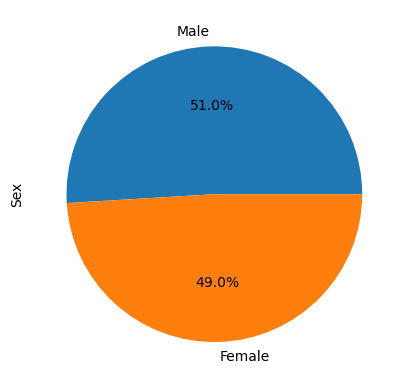

In [579]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
panda_pie = clean_full_data_df["Sex"].value_counts()
panda_pie.plot.pie(autopct= "%1.1f%%")

Text(0, 0.5, 'Sex')

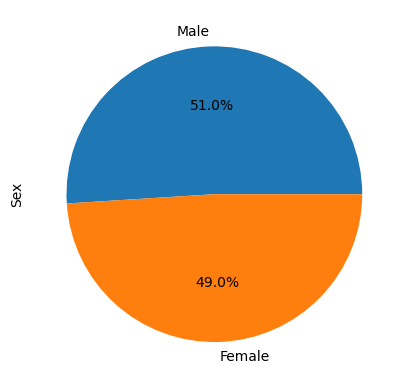

In [580]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male", "Female"]
sizes=[51,49]
fig, py_pie = plt.subplots()
py_pie.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [581]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = clean_full_data_df.loc[clean_full_data_df["Drug Regimen"] == "Capomulin"]
Ramicane = clean_full_data_df.loc[clean_full_data_df["Drug Regimen"] == "Ramicane"]
Infubinol = clean_full_data_df.loc[clean_full_data_df["Drug Regimen"] == "Infubinol"]
Ceftamin = clean_full_data_df.loc[clean_full_data_df["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
clean_max = clean_full_data_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge = pd.merge(clean_max, clean_full_data_df, on=("Mouse ID","Timepoint"),how="left")
tumor_vol = merge[["Mouse ID","Drug Regimen","Tumor Volume (mm3)", "Timepoint"]]
# tumor_vol = tumor_vol.set_index(["Mouse ID"]) -> ruins next cell *remove*
tumor_vol.head(5)

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,a203,Infubinol,67.973419,45
1,a251,Infubinol,65.525743,45
2,a262,Placebo,70.717621,45
3,a275,Ceftamin,62.999356,45
4,a366,Stelasyn,63.440686,30


In [582]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_tumor =[]
Ramicane_tumor =[]
Infubinol_tumor =[]
Ceftamin_tumor =[]

for i in range(len(tumor_vol)-1):
    if tumor_vol.loc[i, "Drug Regimen"] == "Capomulin":
        Capomulin_tumor.append(tumor_vol.loc[i, "Tumor Volume (mm3)"])
    if tumor_vol.loc[i, "Drug Regimen"] == "Ramicane":
        Ramicane_tumor.append(tumor_vol.loc[i, "Tumor Volume (mm3)"])
    if tumor_vol.loc[i, "Drug Regimen"] == "Infubinol":
        Infubinol_tumor.append(tumor_vol.loc[i, "Tumor Volume (mm3)"])
    if tumor_vol.loc[i, "Drug Regimen"] == "Ceftamin":
        Ceftamin_tumor.append(tumor_vol.loc[i, "Tumor Volume (mm3)"])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
treatments_tumor = [Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumor]
for i in range(len(treatments_tumor)):
    print(f'Drug Regimen: {treatments[i]}')
    quartiles = pd.Series(treatments_tumor[i]).quantile([.25,.5,.75])
    lowq = quartiles[0.25]
    upq = quartiles[0.75]
    iqr = upq - lowq
    
    # add subset 
    # already grouped when creating empy lists
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowq - (1.5 * iqr)
    upper_bound = upq + (1.5 * iqr)

    outliers =[]
    for j in range(len(treatments_tumor[i])):
        if (treatments_tumor[i][j] < lower_bound):
            outliers.append(treatments_tumor[i][j]) 
        elif (treatments_tumor[i][j] > upper_bound):
            outliers.append(treatments_tumor[i][j])
        else:
            continue
    if len(outliers)>0:
        print(f'The value(s) {outliers} is/are potential outliers.')
    else: 
        print('No values are potential outliers.')



Drug Regimen: Capomulin
No values are potential outliers.
Drug Regimen: Ramicane
No values are potential outliers.
Drug Regimen: Infubinol
The value(s) [36.3213458] is/are potential outliers.
Drug Regimen: Ceftamin
No values are potential outliers.


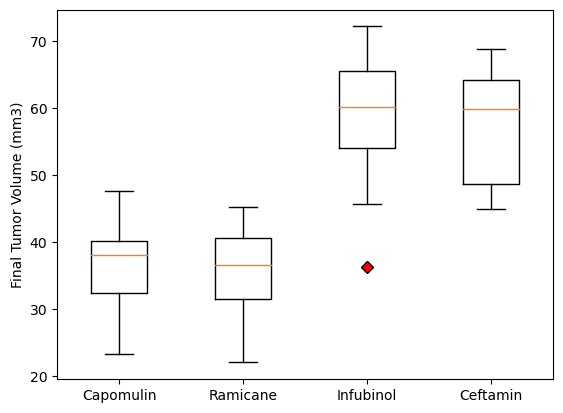

In [583]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
marker = dict(markerfacecolor = "r", marker = "D")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.boxplot(treatments_tumor, flierprops = marker)
ax.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

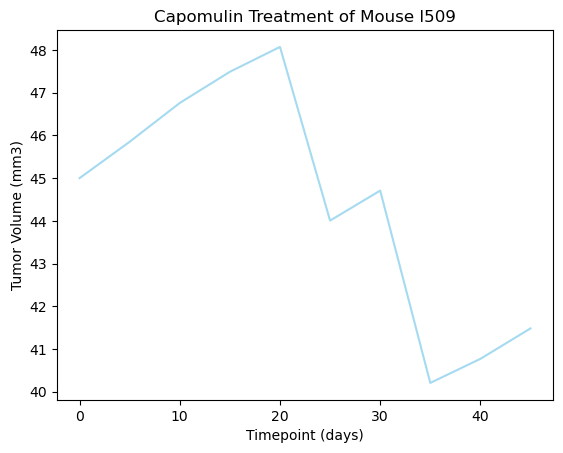

In [584]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_mouse = clean_full_data_df.loc[clean_full_data_df["Mouse ID"] == "l509"]
plt.plot(Capomulin_mouse["Timepoint"],Capomulin_mouse["Tumor Volume (mm3)"], color = "skyblue", alpha = 0.75)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

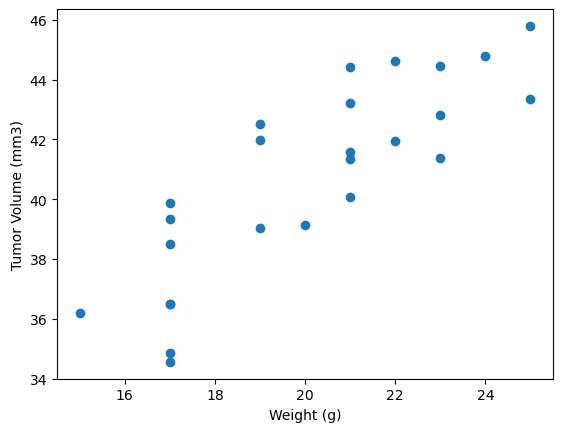

In [585]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_mice = clean_full_data_df.loc[clean_full_data_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
cap_tumor_average = Capomulin_mice["Tumor Volume (mm3)"].mean()
weight = Capomulin_mice["Weight (g)"].unique()
plt.scatter(weight, cap_tumor_average)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


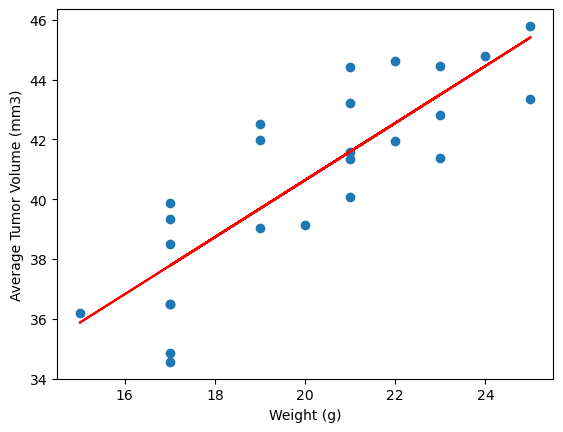

In [586]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = weight.astype(float)
correlation = st.pearsonr(weight, cap_tumor_average)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, cap_tumor_average)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, cap_tumor_average)
plt.plot(weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()